In [1]:
import pandas as pd
import numpy as np

In [2]:
sol=pd.read_csv('SMILES-DATA.csv')
sol

,SMILES,RESULT
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3,0
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C,0
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1,0
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1,0
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1,0
...,...,...
1823,CS(=O)(=O)NCC1COCCN1C(=O)C=C,1
1824,COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C,1
1825,C[C@@H](NC(=O)C=C)C=1C=NC=CN1,1
1826,CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C,1


In [3]:
sol.SMILES

0         C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3
1       CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C
2              CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1
3           C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1
4            C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1
                        ...                  
1823             CS(=O)(=O)NCC1COCCN1C(=O)C=C
1824        COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C
1825            C[C@@H](NC(=O)C=C)C=1C=NC=CN1
1826     CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C
1827            C=CC(=O)N1CCC=2C1=CC=CC2C3CC3
Name: SMILES, Length: 1828, dtype: object

In [4]:
sol.SMILES[8]

'C=CC(=O)N1CCN(CC1)S(=O)(=O)CC=2C=CON2'

In [5]:
from rdkit import Chem

from rdkit.Chem import rdFMCS

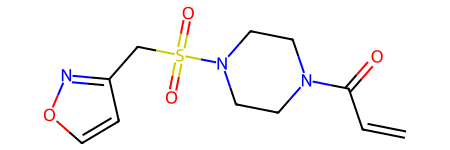

In [6]:
Chem.MolFromSmiles(sol.SMILES[8]) 

In [7]:
for smiles in sol.SMILES[:1]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        
        img = Chem.Draw.MolToImage(mol)
        img.show()
        print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x29DECEDBFD0>


In [8]:
mol_list=[]
for element in sol.SMILES:
    mol=Chem.MolFromSmiles(element)
 
    mol_list.append(mol)

In [9]:
len(mol_list)

1828

In [10]:
mol_list[:1]

In [11]:
sol.head()

,SMILES,RESULT
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3,0
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C,0
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1,0
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1,0
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1,0


In [12]:
X=sol.drop(['RESULT'],axis='columns')
Y=sol['RESULT']

In [13]:
X

,SMILES
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1
...,...
1823,CS(=O)(=O)NCC1COCCN1C(=O)C=C
1824,COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C
1825,C[C@@H](NC(=O)C=C)C=1C=NC=CN1
1826,CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C


In [14]:
Y.value_counts()

0    1600
1     228
Name: RESULT, dtype: int64

In [15]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

from rdkit.Chem import MACCSkeys
fp = MACCSkeys.GenMACCSKeys(mol)
fp

In [16]:
fp_string = fp.ToBitString()
fp_array = np.array(list(fp_string), dtype=int)
fp_string

'00000000000000000000001000000000001000000000000000000000000000100000000000010000000101000000100010011100010000110000011001100000100000010100000010011000011010100111110'

In [17]:
fp_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [18]:
len(fp_string)

167

In [19]:
fp_array.shape

(167,)

In [20]:
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)
    fingerprint = np.array(list(fp.ToBitString()), dtype=int)
    return fingerprint

sol['Fingerprint'] = sol['SMILES'].apply(smiles_to_fingerprint)

X = sol[['Fingerprint']]
X



,Fingerprint
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
1823,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1824,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1825,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1826,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [21]:
fingerprints = sol['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

      0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
1       0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
2       0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
3       0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
4       0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1823    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
1824    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
1825    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1826    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1827    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   

      160  161  162  163  164  165  166  
0       0    1    0  

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
1824,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1825,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
1826,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0


In [22]:
Y=sol[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
...,...
1823,1
1824,1
1825,1
1826,1


In [23]:
Y.value_counts()

RESULT
0         1600
1          228
dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X,Y)

Y_sm.value_counts()

RESULT
0         1600
1         1600
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)



In [26]:
X_train.shape

(1920, 167)

In [27]:
X_test.shape

(640, 167)

In [28]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', random_state=42)

mlp_classifier.fit(X_train, Y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

kerasmodel= Sequential()
kerasmodel.add(Dense(10,input_shape=(167,),activation='sigmoid'))
kerasmodel.add(Dense(30,activation='relu'))
kerasmodel.add(Dense(60, activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))
kerasmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(kerasmodel.summary())

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
X_val

In [ ]:
X_train.shape

In [ ]:
X_val.shape

In [ ]:
X_test.shape

In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

kerasmodel.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=20, batch_size=10)

Y_preds = kerasmodel.predict(X_test)

Y_preds.shape


Y_pd = (Y_preds > 0.5).astype(int)
        

print("Classification Report:\n", classification_report(Y_test, Y_pd))

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pd))


fp_indices = np.where((Y_pd == 1) & (Y_test == 0))[0]

fn_indices = np.where((Y_pd == 0) & (Y_test == 1))[0]

print("False Positives (FP):", fp_indices)
print("False Negatives (FN):", fn_indices)

In [ ]:
loss, accuracy = kerasmodel.evaluate(X_test, Y_test)
print("Testing loss:", loss)
print("Testing accuracy:", accuracy)

In [ ]:
import matplotlib.pyplot as plt
history = kerasmodel.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=10)


In [ ]:
history = kerasmodel.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=10)


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training and validation accuracy
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_history(history)